### Consumer complaint classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
df = pd.read_csv("Consumer_Complaints.csv")

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/14,Closed with explanation,Yes,No,759217
1,10/1/16,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/16,Closed with explanation,Yes,No,2141773
2,10/17/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/16,Closed with explanation,Yes,No,2163100
3,6/8/14,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/14,Closed with explanation,Yes,Yes,885638
4,9/13/14,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/14,Closed with explanation,Yes,Yes,1027760


In [4]:
df.shape

(9999, 18)

In [5]:
col = ['Product', 'Consumer Complaint']
df= df[col]

In [6]:
df= df[pd.notnull(df['Consumer Complaint'])]

In [7]:
df.columns=['Product', 'Consumer_complaint']

In [8]:
df['category_id'] = df['Product'].factorize()[0]

In [9]:
cat_id_df = df[["Product", "category_id"]].drop_duplicates().sort_values('category_id')

In [10]:
cat_to_id = dict(cat_id_df.values)

In [11]:
id_to_cat = dict(cat_id_df[['category_id','Product']].values)

In [12]:
df.head()

,Product,Consumer_complaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [13]:
fig = plt.figure(figsize= (8,6))

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Product'>

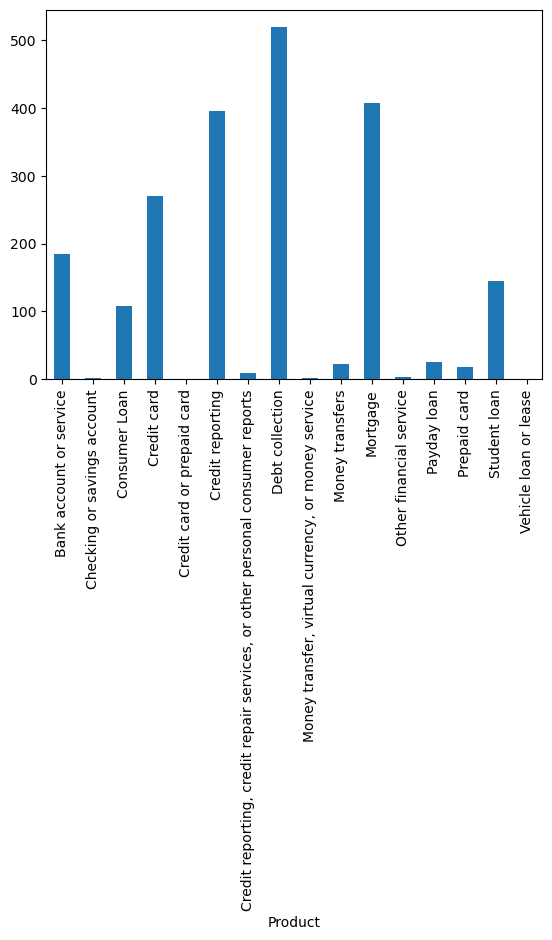

In [14]:
df.groupby('Product').Consumer_complaint.count().plot.bar(ylim=0)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english') #to remove all common pronouns to reduce the number of noisy features

In [17]:
features = tfidf.fit_transform(df.Consumer_complaint).toarray()

In [18]:
labels = df.category_id
features.shape

(2114, 6081)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint'], df['Product'], random_state= 0)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
count_vect = CountVectorizer()

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

### Model Building

In [25]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [26]:
print(clf.predict(count_vect.transform(['I have outdated information on my credit repor'])))

['Credit reporting']


In [27]:
y_pred = clf.predict(count_vect.transform(X_test))

In [28]:
from sklearn import metrics

In [29]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.60      0.80      0.69        44
                                                               Consumer Loan       0.36      0.43      0.39        21
                                                                 Credit card       0.69      0.78      0.73        72
                                                            Credit reporting       0.70      0.87      0.77        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.86      0.69      0.76       124
                                                             Money transfers       0.20      0.09      0.13        11
                                                       

C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.pipeline import Pipeline

In [31]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',LinearSVC())])

In [32]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', LinearSVC())])

In [33]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Credit reporting'

In [34]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))

C:\Users\range\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.7936908517350157


In [35]:
from sklearn.naive_bayes import BernoulliNB

In [36]:
mb=BernoulliNB()

In [37]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',BernoulliNB())])

In [38]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', BernoulliNB())])

In [39]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Credit reporting'

In [40]:
y_pred=text_clf.predict(X_test)

In [41]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.71      0.55      0.62        44
                                                               Consumer Loan       0.50      0.14      0.22        21
                                                                 Credit card       0.69      0.60      0.64        72
                                                            Credit reporting       0.60      0.92      0.73        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.63      0.84      0.72       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))

C:\Users\range\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.6580441640378549


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',DecisionTreeClassifier())])

In [45]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', DecisionTreeClassifier())])

In [46]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Debt collection'

In [47]:
y_pred=text_clf.predict(X_test)

In [48]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.36      0.45      0.40        44
                                                               Consumer Loan       0.30      0.33      0.32        21
                                                                 Credit card       0.66      0.64      0.65        72
                                                 Credit card or prepaid card       0.00      0.00      0.00         0
                                                            Credit reporting       0.67      0.74      0.70        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.68      0.65      0.67       124
                          Money transfer, virtual curre

C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [49]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))

C:\Users\range\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.616403785488959


In [50]:
!pip install catboost


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from catboost import CatBoostClassifier

In [52]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',CatBoostClassifier())])

In [53]:
text_clf.fit(X_train, y_train)

Learning rate set to 0.081007
0:	learn: 2.4854640	total: 812ms	remaining: 13m 31s
1:	learn: 2.2831591	total: 1.48s	remaining: 12m 16s
2:	learn: 2.1564614	total: 2.13s	remaining: 11m 47s
3:	learn: 2.0605129	total: 2.79s	remaining: 11m 35s
4:	learn: 1.9462300	total: 3.45s	remaining: 11m 26s
5:	learn: 1.8610484	total: 4.12s	remaining: 11m 22s
6:	learn: 1.7890315	total: 4.82s	remaining: 11m 24s
7:	learn: 1.7248507	total: 5.52s	remaining: 11m 24s
8:	learn: 1.6704831	total: 6.21s	remaining: 11m 23s
9:	learn: 1.6290230	total: 6.89s	remaining: 11m 21s
10:	learn: 1.5851092	total: 7.58s	remaining: 11m 21s
11:	learn: 1.5387648	total: 8.26s	remaining: 11m 20s
12:	learn: 1.5082813	total: 8.92s	remaining: 11m 17s
13:	learn: 1.4703662	total: 9.59s	remaining: 11m 15s
14:	learn: 1.4445402	total: 10.3s	remaining: 11m 13s
15:	learn: 1.4213383	total: 10.9s	remaining: 11m 11s
16:	learn: 1.3953513	total: 11.6s	remaining: 11m 9s
17:	learn: 1.3735164	total: 12.2s	remaining: 11m 7s
18:	learn: 1.3509443	total: 

154:	learn: 0.7525985	total: 1m 45s	remaining: 9m 36s
155:	learn: 0.7510070	total: 1m 46s	remaining: 9m 35s
156:	learn: 0.7498981	total: 1m 47s	remaining: 9m 35s
157:	learn: 0.7489539	total: 1m 47s	remaining: 9m 34s
158:	learn: 0.7481149	total: 1m 48s	remaining: 9m 34s
159:	learn: 0.7451465	total: 1m 49s	remaining: 9m 33s
160:	learn: 0.7444409	total: 1m 49s	remaining: 9m 32s
161:	learn: 0.7428568	total: 1m 50s	remaining: 9m 32s
162:	learn: 0.7417085	total: 1m 51s	remaining: 9m 31s
163:	learn: 0.7412448	total: 1m 52s	remaining: 9m 31s
164:	learn: 0.7378078	total: 1m 52s	remaining: 9m 30s
165:	learn: 0.7374767	total: 1m 53s	remaining: 9m 30s
166:	learn: 0.7369168	total: 1m 54s	remaining: 9m 29s
167:	learn: 0.7361064	total: 1m 54s	remaining: 9m 28s
168:	learn: 0.7351648	total: 1m 55s	remaining: 9m 28s
169:	learn: 0.7334652	total: 1m 56s	remaining: 9m 27s
170:	learn: 0.7331014	total: 1m 56s	remaining: 9m 26s
171:	learn: 0.7321712	total: 1m 57s	remaining: 9m 26s
172:	learn: 0.7308025	total:

308:	learn: 0.6224458	total: 3m 34s	remaining: 7m 58s
309:	learn: 0.6217015	total: 3m 34s	remaining: 7m 57s
310:	learn: 0.6214223	total: 3m 35s	remaining: 7m 57s
311:	learn: 0.6212131	total: 3m 36s	remaining: 7m 56s
312:	learn: 0.6209477	total: 3m 36s	remaining: 7m 55s
313:	learn: 0.6206643	total: 3m 37s	remaining: 7m 55s
314:	learn: 0.6204832	total: 3m 38s	remaining: 7m 54s
315:	learn: 0.6201228	total: 3m 38s	remaining: 7m 53s
316:	learn: 0.6198125	total: 3m 39s	remaining: 7m 53s
317:	learn: 0.6191932	total: 3m 40s	remaining: 7m 52s
318:	learn: 0.6185327	total: 3m 41s	remaining: 7m 51s
319:	learn: 0.6182441	total: 3m 41s	remaining: 7m 51s
320:	learn: 0.6170650	total: 3m 42s	remaining: 7m 50s
321:	learn: 0.6167615	total: 3m 43s	remaining: 7m 49s
322:	learn: 0.6164124	total: 3m 43s	remaining: 7m 49s
323:	learn: 0.6155035	total: 3m 44s	remaining: 7m 48s
324:	learn: 0.6150762	total: 3m 45s	remaining: 7m 47s
325:	learn: 0.6147879	total: 3m 46s	remaining: 7m 47s
326:	learn: 0.6145871	total:

461:	learn: 0.5528003	total: 5m 22s	remaining: 6m 16s
462:	learn: 0.5524293	total: 5m 23s	remaining: 6m 15s
463:	learn: 0.5521044	total: 5m 24s	remaining: 6m 14s
464:	learn: 0.5518667	total: 5m 25s	remaining: 6m 13s
465:	learn: 0.5517001	total: 5m 25s	remaining: 6m 13s
466:	learn: 0.5513648	total: 5m 26s	remaining: 6m 12s
467:	learn: 0.5511759	total: 5m 27s	remaining: 6m 11s
468:	learn: 0.5509242	total: 5m 27s	remaining: 6m 11s
469:	learn: 0.5505749	total: 5m 28s	remaining: 6m 10s
470:	learn: 0.5497040	total: 5m 29s	remaining: 6m 9s
471:	learn: 0.5494769	total: 5m 30s	remaining: 6m 9s
472:	learn: 0.5486725	total: 5m 30s	remaining: 6m 8s
473:	learn: 0.5484884	total: 5m 31s	remaining: 6m 7s
474:	learn: 0.5477416	total: 5m 32s	remaining: 6m 7s
475:	learn: 0.5468931	total: 5m 32s	remaining: 6m 6s
476:	learn: 0.5463634	total: 5m 33s	remaining: 6m 5s
477:	learn: 0.5461623	total: 5m 34s	remaining: 6m 5s
478:	learn: 0.5459421	total: 5m 35s	remaining: 6m 4s
479:	learn: 0.5454158	total: 5m 35s	r

615:	learn: 0.4954899	total: 8m 16s	remaining: 5m 9s
616:	learn: 0.4950648	total: 8m 16s	remaining: 5m 8s
617:	learn: 0.4947904	total: 8m 17s	remaining: 5m 7s
618:	learn: 0.4946235	total: 8m 18s	remaining: 5m 6s
619:	learn: 0.4943345	total: 8m 19s	remaining: 5m 5s
620:	learn: 0.4940507	total: 8m 19s	remaining: 5m 4s
621:	learn: 0.4939017	total: 8m 20s	remaining: 5m 4s
622:	learn: 0.4937073	total: 8m 21s	remaining: 5m 3s
623:	learn: 0.4935755	total: 8m 21s	remaining: 5m 2s
624:	learn: 0.4934091	total: 8m 22s	remaining: 5m 1s
625:	learn: 0.4931882	total: 8m 23s	remaining: 5m
626:	learn: 0.4928698	total: 8m 23s	remaining: 4m 59s
627:	learn: 0.4927407	total: 8m 24s	remaining: 4m 58s
628:	learn: 0.4917954	total: 8m 25s	remaining: 4m 57s
629:	learn: 0.4915984	total: 8m 25s	remaining: 4m 57s
630:	learn: 0.4914062	total: 8m 26s	remaining: 4m 56s
631:	learn: 0.4912008	total: 8m 27s	remaining: 4m 55s
632:	learn: 0.4909101	total: 8m 27s	remaining: 4m 54s
633:	learn: 0.4904686	total: 8m 28s	remain

768:	learn: 0.4529139	total: 10m 4s	remaining: 3m 1s
769:	learn: 0.4526875	total: 10m 5s	remaining: 3m
770:	learn: 0.4525423	total: 10m 5s	remaining: 2m 59s
771:	learn: 0.4521057	total: 10m 6s	remaining: 2m 59s
772:	learn: 0.4519179	total: 10m 7s	remaining: 2m 58s
773:	learn: 0.4517791	total: 10m 7s	remaining: 2m 57s
774:	learn: 0.4515923	total: 10m 8s	remaining: 2m 56s
775:	learn: 0.4513721	total: 10m 9s	remaining: 2m 55s
776:	learn: 0.4512267	total: 10m 10s	remaining: 2m 55s
777:	learn: 0.4510130	total: 10m 10s	remaining: 2m 54s
778:	learn: 0.4507968	total: 10m 11s	remaining: 2m 53s
779:	learn: 0.4506124	total: 10m 12s	remaining: 2m 52s
780:	learn: 0.4497641	total: 10m 12s	remaining: 2m 51s
781:	learn: 0.4496009	total: 10m 13s	remaining: 2m 51s
782:	learn: 0.4491281	total: 10m 14s	remaining: 2m 50s
783:	learn: 0.4483521	total: 10m 15s	remaining: 2m 49s
784:	learn: 0.4481770	total: 10m 15s	remaining: 2m 48s
785:	learn: 0.4480261	total: 10m 16s	remaining: 2m 47s
786:	learn: 0.4478692	t

919:	learn: 0.4174844	total: 11m 52s	remaining: 1m 1s
920:	learn: 0.4173000	total: 11m 53s	remaining: 1m 1s
921:	learn: 0.4167445	total: 11m 54s	remaining: 1m
922:	learn: 0.4165530	total: 11m 54s	remaining: 59.6s
923:	learn: 0.4163912	total: 11m 55s	remaining: 58.9s
924:	learn: 0.4162170	total: 11m 56s	remaining: 58.1s
925:	learn: 0.4157980	total: 11m 56s	remaining: 57.3s
926:	learn: 0.4156596	total: 11m 57s	remaining: 56.5s
927:	learn: 0.4153653	total: 11m 58s	remaining: 55.7s
928:	learn: 0.4151255	total: 11m 59s	remaining: 55s
929:	learn: 0.4149566	total: 11m 59s	remaining: 54.2s
930:	learn: 0.4148561	total: 12m	remaining: 53.4s
931:	learn: 0.4147549	total: 12m 1s	remaining: 52.6s
932:	learn: 0.4146292	total: 12m 2s	remaining: 51.9s
933:	learn: 0.4143826	total: 12m 2s	remaining: 51.1s
934:	learn: 0.4141720	total: 12m 3s	remaining: 50.3s
935:	learn: 0.4140127	total: 12m 4s	remaining: 49.5s
936:	learn: 0.4138690	total: 12m 4s	remaining: 48.7s
937:	learn: 0.4137525	total: 12m 5s	remaini

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x0000014CD714B610>)])

In [54]:
y_pred=text_clf.predict(X_test)

In [55]:
y_pred

array([['Credit card'],
       ['Credit card'],
       ['Debt collection'],
       ['Debt collection'],
       ['Mortgage'],
       ['Credit reporting'],
       ['Student loan'],
       ['Credit card'],
       ['Debt collection'],
       ['Bank account or service'],
       ['Mortgage'],
       ['Bank account or service'],
       ['Mortgage'],
       ['Debt collection'],
       ['Debt collection'],
       ['Mortgage'],
       ['Mortgage'],
       ['Mortgage'],
       ['Mortgage'],
       ['Mortgage'],
       ['Debt collection'],
       ['Mortgage'],
       ['Credit reporting'],
       ['Debt collection'],
       ['Credit reporting'],
       ['Credit reporting'],
       ['Debt collection'],
       ['Credit reporting'],
       ['Bank account or service'],
       ['Credit card'],
       ['Credit reporting'],
       ['Credit reporting'],
       ['Bank account or service'],
       ['Bank account or service'],
       ['Credit card'],
       ['Bank account or service'],
       ['Credit card'],

In [56]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.65      0.75      0.69        44
                                                               Consumer Loan       0.79      0.52      0.63        21
                                                                 Credit card       0.75      0.78      0.76        72
                                                            Credit reporting       0.79      0.85      0.81        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.72      0.82      0.77       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf=RandomForestClassifier()

In [59]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',RandomForestClassifier())])

In [60]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', RandomForestClassifier())])

In [61]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Debt collection'

In [62]:
y_pred=text_clf.predict(X_test)

In [63]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.75      0.75      0.75        44
                                                               Consumer Loan       0.50      0.19      0.28        21
                                                                 Credit card       0.80      0.83      0.82        72
                                                            Credit reporting       0.75      0.85      0.80        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.71      0.88      0.78       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)

C:\Users\range\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [65]:
print(np.mean(cv_results))

0.7514195583596214


In [70]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 1.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 2.5 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.4 MB 2.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 3.6 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 4.4 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 3.5 MB/s eta 0:00:01
   ------------------------------------- -- 1.3/1.4 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from lightgbm import LGBMClassifier

In [72]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',LGBMClassifier())])

In [73]:
text_clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24188
[LightGBM] [Info] Number of data points in the train set: 1585, number of used features: 1065
[LightGBM] [Info] Start training from score -2.419580
[LightGBM] [Info] Start training from score -6.675193
[LightGBM] [Info] Start training from score -2.902432
[LightGBM] [Info] Start training from score -2.080073
[LightGBM] [Info] Start training from score -7.368340
[LightGBM] [Info] Start training from score -1.651312
[LightGBM] [Info] Start training from score -5.422430
[LightGBM] [Info] Start training from score -1.389454
[LightGBM] [Info] Start training from score -6.675193
[LightGBM] [Info] Start training from score -4.970444
[LightGBM] [Info] Start training from score -1.684760
[LightGBM] [Info] Start training from score -6.2697

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', LGBMClassifier())])

In [74]:
y_pred=text_clf.predict(X_test)

In [75]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.70      0.68      0.69        44
                                                               Consumer Loan       0.47      0.38      0.42        21
                                                                 Credit card       0.73      0.81      0.77        72
                                                            Credit reporting       0.81      0.84      0.82        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.73      0.87      0.79       124
                                                             Money transfers       1.00      0.18      0.31        11
                                                       

C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)

C:\Users\range\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\range\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [77]:
print(np.mean(cv_results))

0.7678233438485805


### Hyperparameter Tuning

In [78]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [79]:
 #Randomized Search CV
 import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [80]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [82]:
# Use the random grid to search for best hyperparameters
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5,n_jobs=-1)

In [83]:
rf.fit(X_train_tfidf, y_train)

C:\Users\range\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='accuracy')

In [84]:
rf.best_params_

{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [85]:
rf.best_score_

0.7255520504731862